<a href="https://colab.research.google.com/github/PauloArthurFarias/Processamento-de-Linguagem-Natural/blob/main/Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
base_census = pd.read_csv(r'/content/census.csv')
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
base_census.loc[base_census['age'] < 0].sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


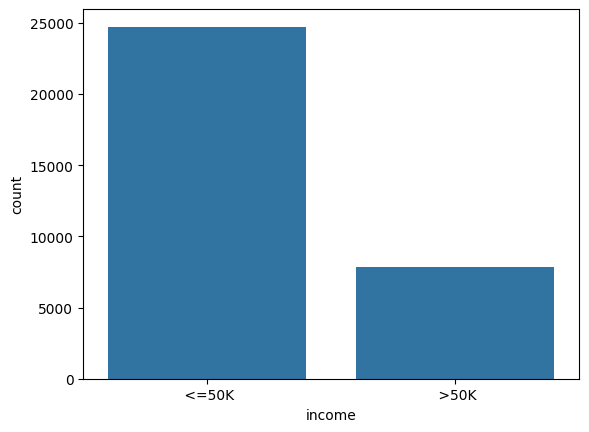

In [27]:
np.unique(base_census['income'], return_counts = True)
sns.countplot(x = base_census['income']);

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

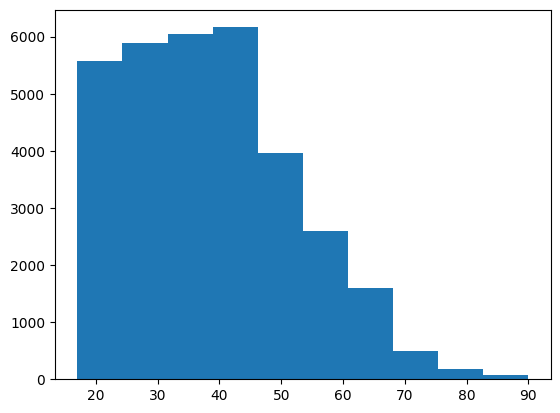

In [29]:
plt.hist(x = base_census['age'])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

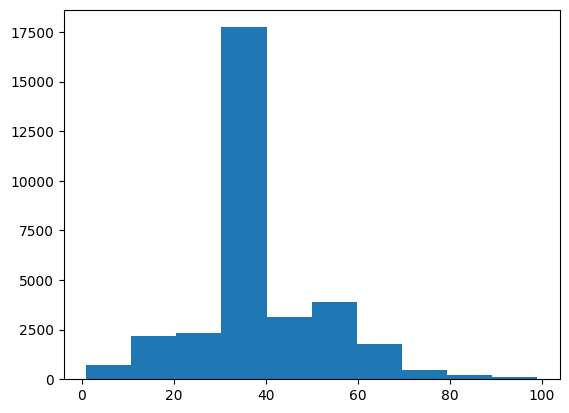

In [30]:
plt.hist(x = base_census['hour-per-week'])

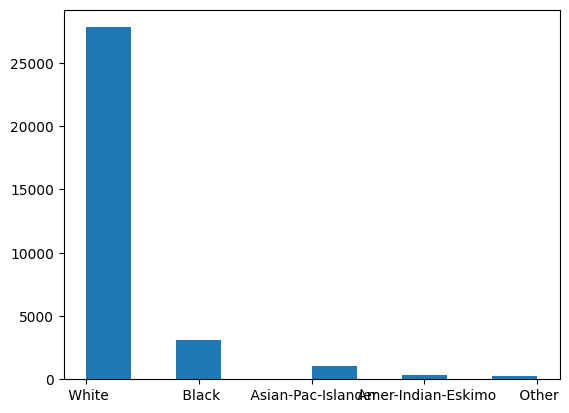

In [40]:
plt.hist(x = base_census['race']);

In [48]:
grafico = px.treemap(base_census, path =['workclass', 'age', 'race'])
grafico.show()

In [46]:
px.treemap(base_census, path=['occupation', 'race'])

In [81]:
#divisão entre atributos previsores e classe

x_census = base_census.iloc[:, 0:14].values
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [56]:
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [61]:
from sklearn.preprocessing import LabelEncoder


In [63]:
label_encoder_teste = LabelEncoder()

teste = label_encoder_teste.fit_transform(x_census[:, 1])
teste

array([7, 6, 4, ..., 4, 4, 5])

In [80]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [82]:
LabelEncoderWorkclass = LabelEncoder()
LabelEncoderEducation = LabelEncoder()
LabelEncoderMaritalStatus = LabelEncoder()
LabelEncoderOccupation = LabelEncoder()
LabelEncoderRelationship = LabelEncoder()
LabelEncoderRace = LabelEncoder()
LabelEncoderSex = LabelEncoder()
LabelEncoderNativeCountry = LabelEncoder()

In [89]:
x_census[:, 1] = LabelEncoderWorkclass.fit_transform(x_census[:, 1])
x_census[:, 3] = LabelEncoderEducation.fit_transform(x_census[:, 3])
x_census[:, 5] = LabelEncoderMaritalStatus.fit_transform(x_census[:, 5])
x_census[:, 6] = LabelEncoderOccupation.fit_transform(x_census[:, 6])
x_census[:, 7] = LabelEncoderRelationship.fit_transform(x_census[:, 7])
x_census[:, 8] = LabelEncoderRace.fit_transform(x_census[:, 8])
x_census[:, 9] = LabelEncoderSex.fit_transform(x_census[:, 9])
x_census[:, 13] = LabelEncoderNativeCountry.fit_transform(x_census[:, 13])
x_census[0]

array([39, 39, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [90]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [99]:
OneHotEncoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
x_census = OneHotEncoder_census.fit_transform(x_census)
x_census[0]

array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [102]:
from sklearn.preprocessing import StandardScaler

scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)
x_census[0]

array([ 0.02416321, -0.02416321,  0.0480488 , -0.0480488 ,  0.05409379,
       -0.05409379, -0.04641598,  0.04641598,  0.04641598, -0.04641598,
       -0.02933708,  0.02933708,  0.02933708, -0.02933708,  0.05264698,
       -0.05264698,  0.02416321,  0.0480488 ,  0.05409379,  0.05714946,
       -0.05714946,  0.05264698,  0.04437806, -0.04437806, -0.13502327,
       -0.06107342, -0.04260602, -0.02985682, -0.06500204, -0.02985682,
       -0.03678503, -0.00554189, -0.01998525, -0.02479131, -0.01998525,
       -0.05550333, -0.03636406, -0.02715919, -0.04740236, -0.04993839,
       -0.04367781, -0.02351838, -0.1419344 , -0.03233087, -0.02073999,
       -0.03087016, -0.07821827, -0.04296623, -0.03372864, -0.05927412,
       -0.01920091, -0.0496284 , -0.03960742, -0.02351838, -0.02416321,
        0.34095391, -0.04540836, -0.02217266, -0.17175325, -0.19348662,
       -0.11609195, -0.07201601, -0.10164955, -0.1422718 , -0.12664495,
       -0.18406376, -0.21053433,  2.25399324, -0.11334387, -0.68

In [104]:
from sklearn.model_selection import train_test_split

In [107]:
x_censusTreinamento, x_censusTeste, y_censusTreinamento, y_censusTeste = train_test_split(x_census, y_census, test_size = 0.15, random_state = 0)
x_censusTreinamento.shape, y_censusTreinamento.shape

((27676, 157), (27676,))

In [108]:
import pickle

In [109]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([x_censusTreinamento, y_censusTreinamento, x_censusTeste, y_censusTeste], f)